# Isolation Forest

### implements of Isolation Forest

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder

In [3]:
# read dataset
grade_math = pd.read_csv('uk_math_scores_dataset.csv')

In [4]:
# Display basic dataset information
print("نمایش 5 ردیف اول دیتاست:")
print(grade_math.head())
print("\nاطلاعات کلی دیتاست:")
print(grade_math.info())

نمایش 5 ردیف اول دیتاست:
             Name  Gender Class  Math_Score
0     Grace Lewis  Female    7C        13.6
1      Jacob Hall    Male    7D        14.6
2  Harrison Davis    Male    7A        13.9
3    Amelia Davis  Female    7C        11.7
4     Sophia Hall  Female    7C        16.3

اطلاعات کلی دیتاست:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        300 non-null    object 
 1   Gender      300 non-null    object 
 2   Class       300 non-null    object 
 3   Math_Score  300 non-null    float64
dtypes: float64(1), object(3)
memory usage: 9.5+ KB
None


In [5]:
# Converting qualitative variables to numerical ones
le = LabelEncoder()
grade_math['Gender_encoded'] = le.fit_transform(grade_math['Math_Score'])
grade_math['Class_encoded'] = le.fit_transform(grade_math['Class'])

# Selecting features for the model
features = ['Gender_encoded', 'Class_encoded', 'Math_Score']
X = grade_math[features]

# Isolation Forest Model Training
# Setting contamination=0.05 means expecting 5% anomalies in the data.
model = IsolationForest(contamination=0.05, random_state=42)
model.fit(X)
grade_math['anomaly_score'] = model.decision_function(X)
grade_math['is_anomaly'] = model.predict(X)

# Convert results into understandable format (1 = normal, -1 = abnormal)
grade_math['is_anomaly'] = grade_math['is_anomaly'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')

In [6]:
# نمایش تعداد ناهنجاری‌ها
print("\nتعداد ناهنجاری‌های شناسایی شده:")
print(grade_math['is_anomaly'].value_counts())

# نمایش 10 نمونه ناهنجاری
print("\nنمونه‌هایی از ناهنجاری‌های شناسایی شده:")
print(grade_math[grade_math['is_anomaly'] == 'Anomaly'].head(10))


تعداد ناهنجاری‌های شناسایی شده:
is_anomaly
Normal     285
Anomaly     15
Name: count, dtype: int64

نمونه‌هایی از ناهنجاری‌های شناسایی شده:
                Name  Gender Class  Math_Score  Gender_encoded  Class_encoded  \
15       Poppy Davis  Female    7A        18.5              85              0   
51        Ruby Allen  Female    7B         5.1               2              1   
65      Sophia Smith  Female    7B        19.4              89              1   
70       Freya Lewis  Female    7B         7.8               7              1   
84   Alexander Moore    Male    7C         8.9               8              2   
95    Benjamin Clark    Male    7B        20.0              90              1   
115   Rosie Anderson  Female    7D        19.2              87              3   
128       Evie Young  Female    7D        19.4              89              3   
148     Alfie Garcia    Male    7A         7.5               6              0   
158      Oscar Clark    Male    7A         1.5   

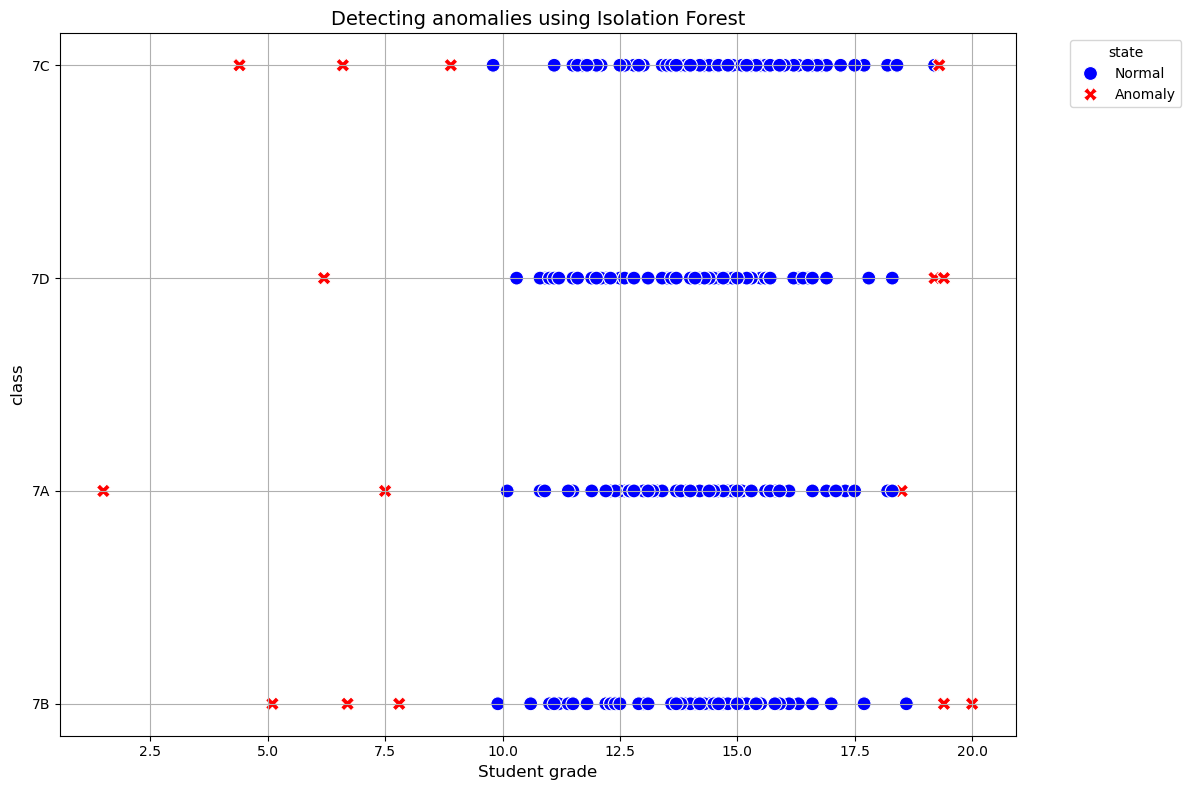

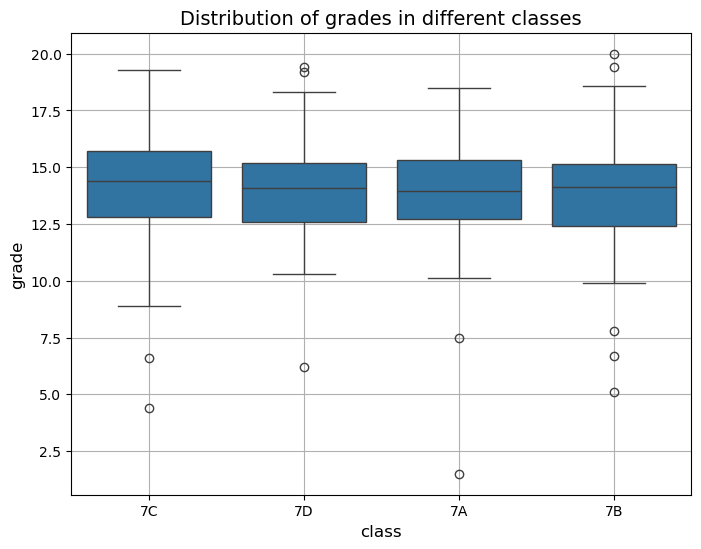

In [9]:
# Draw a Scatter Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=grade_math, x='Math_Score', y='Class', hue='is_anomaly', 
                palette={'Normal': 'blue', 'Anomaly': 'red'}, 
                style='is_anomaly', s=100)
plt.title('Detecting anomalies using Isolation Forest', fontsize=14)
plt.xlabel('Student grade', fontsize=12)
plt.ylabel('class', fontsize=12)
plt.legend(title='state', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Box plot of scores to check for anomalies
plt.figure(figsize=(8, 6))
sns.boxplot(data=grade_math, x='Class', y='Math_Score')
plt.title('Distribution of grades in different classes', fontsize=14)
plt.xlabel('class', fontsize=12)
plt.ylabel('grade', fontsize=12)
plt.grid(True)
plt.show()